In [43]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

In [44]:
df = pd.read_csv('C:\Github\MACHINE_LEARNING-1\MachineLearningAlgorithms\DecisionTree\synthetic_adds_data.csv')

In [45]:
df.head()

,user_id,Gender,Age,EstimatedSalary,purchased
0,6,M,49,65893,1
1,1,M,62,38750,0
2,7,F,36,115259,0
3,9,F,18,142210,1
4,1,M,58,96538,0


In [46]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder




def analyzer(df, max_depth):
    # Convert categorical 'Gender' column to numeric using LabelEncoder
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])  # M=1, F=0

    # Use selected features for training
    X = df[['Gender', 'Age']].values  # First two features
    y = df['purchased'].values

    # Initialize and fit the classifier
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X, y)

    # Define the grid for visualization
    a = np.arange(start=X[:, 0].min() - 1, stop=X[:, 0].max() + 1, step=0.01)
    b = np.arange(start=X[:, 1].min() - 1, stop=X[:, 1].max() + 1, step=0.01)
    XX, YY = np.meshgrid(a, b)
    input_array = np.array([XX.ravel(), YY.ravel()]).T

    # Predict labels for the grid points
    labels = clf.predict(input_array)

    # Plot the decision boundary
    plt.contourf(XX, YY, labels.reshape(XX.shape), alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(('red', 'green')))
    plt.xlim(XX.min(), XX.max())
    plt.ylim(YY.min(), YY.max())
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1 (Gender)")
    plt.ylabel("Feature 2 (Age)")
    plt.show()




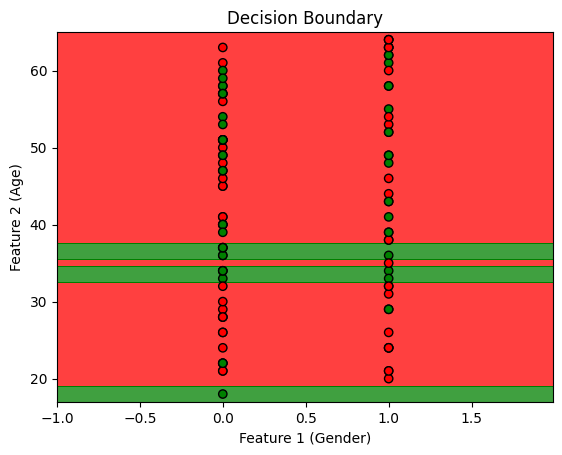

In [47]:
analyzer(df, max_depth=4)